 нужно построить линейные регрессии для каждого домохозяйства по продуктах с сахаром и без сахара


То есть у тебя получится по две регрессии вида 

U(P) = a0 + a1*P, где U - полезность, Р - цена

для каждого из 317 домохозяйств

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas.compat.pyarrow import pa
import warnings
warnings.filterwarnings("ignore")

Проверить цена или стоимость => цена

Заменить choice на бинарую переменную


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AnikaJha/cola_project_dataset/main/panelist_2nd.csv')
data = data[['Panelist', 'Choice', 'Grams_of_sugar_per_100_ml', 'Price']]
data 

,Panelist,Choice,Grams_of_sugar_per_100_ml,Price
0,636220.0,0.0,7.6,65.0
1,636220.0,0.0,10.9,117.0
2,636220.0,0.0,7.8,117.0
3,636220.0,0.0,2.3,38.0
4,636220.0,0.0,2.3,35.4
...,...,...,...,...
119178,700750.0,1.0,4.8,49.0
119179,700750.0,1.0,4.7,49.0
119180,700750.0,4.0,4.8,49.0
119181,700750.0,4.0,4.7,49.0


In [3]:
#replace values in 'Choice' that are greater than 1 with 1
data.loc[data['Choice']>1, 'Choice'] = 1

In [4]:
data['Panelist'] = data['Panelist'].astype(int)
data['Choice'] = data['Choice'].astype(int)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119183 entries, 0 to 119182
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Panelist                   119183 non-null  int64  
 1   Choice                     119183 non-null  int64  
 2   Grams_of_sugar_per_100_ml  119183 non-null  float64
 3   Price                      119183 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.6 MB


In [6]:
unique = []
zeros = []
nans = []
for i in data.columns:
  unique.append(data[i].nunique())
  zeros.append(data[i].isin([0]).sum())
  nans.append(data[i].isna().sum())


In [7]:
table_1= pd.DataFrame()
table_1['VARIABLE'] = data.columns
table_1['UNIQUE'] = unique
#table_1['PERCENT_UNIQUE'] = per_unique
table_1['ZEROS'] = zeros
#table_1['PERCENT_ZEROS'] = per_zeros
table_1['NANS'] = nans
#table_1['PERCENT_NANS'] = per_nan
table_1

,VARIABLE,UNIQUE,ZEROS,NANS
0,Panelist,1994,0,0
1,Choice,2,110648,0
2,Grams_of_sugar_per_100_ml,43,33261,0
3,Price,5161,0,0


In [8]:
#df['Choice'].unique()

In [6]:
data

,Panelist,Choice,Grams_of_sugar_per_100_ml,Price
0,636220,0,7.6,65.0
1,636220,0,10.9,117.0
2,636220,0,7.8,117.0
3,636220,0,2.3,38.0
4,636220,0,2.3,35.4
...,...,...,...,...
119178,700750,1,4.8,49.0
119179,700750,1,4.7,49.0
119180,700750,1,4.8,49.0
119181,700750,1,4.7,49.0


# Sampling

In [10]:
panelists = data['Panelist'].unique()
panelists_df = pd.DataFrame(panelists, columns=['Panelist'])
# Randomly select 10% of the panelists

sampled_panelists = panelists_df.sample(frac=0.10, random_state=42)

# Subset the dataset to include only the rows corresponding to the selected panelists
df = data[data['Panelist'].isin(sampled_panelists['Panelist'])]
df

,Panelist,Choice,Grams_of_sugar_per_100_ml,Price
741,800540,0,7.6,74.000000
742,800540,0,10.9,117.000000
743,800540,0,7.8,117.000000
744,800540,0,2.3,40.500000
745,800540,1,2.3,39.800000
...,...,...,...,...
119144,624670,0,6.6,64.622231
119178,700750,1,4.8,49.000000
119179,700750,1,4.7,49.000000
119180,700750,1,4.8,49.000000


In [11]:
unique = []
zeros = []
nans = []
for i in df.columns:
  unique.append(df[i].nunique())
  zeros.append(df[i].isin([0]).sum())
  nans.append(df[i].isna().sum())


In [12]:
table_1= pd.DataFrame()
table_1['VARIABLE'] = df.columns
table_1['UNIQUE'] = unique
#table_1['PERCENT_UNIQUE'] = per_unique
table_1['ZEROS'] = zeros
#table_1['PERCENT_ZEROS'] = per_zeros
table_1['NANS'] = nans
#table_1['PERCENT_NANS'] = per_nan
table_1

,VARIABLE,UNIQUE,ZEROS,NANS
0,Panelist,199,0,0
1,Choice,2,9314,0
2,Grams_of_sugar_per_100_ml,43,3023,0
3,Price,2104,0,0


In [13]:
data.groupby('Panelist').size()

Panelist
710       20
1280      30
4700      47
7220      16
7770      39
          ..
808440     7
808540     6
808550    62
808560    11
927800    20
Length: 1994, dtype: int64

In [14]:
df.groupby('Panelist').size()

Panelist
17220      24
29690      83
35590     151
53340      11
57120      12
         ... 
804100     26
804850      3
808140     11
808440      7
808550     62
Length: 199, dtype: int64

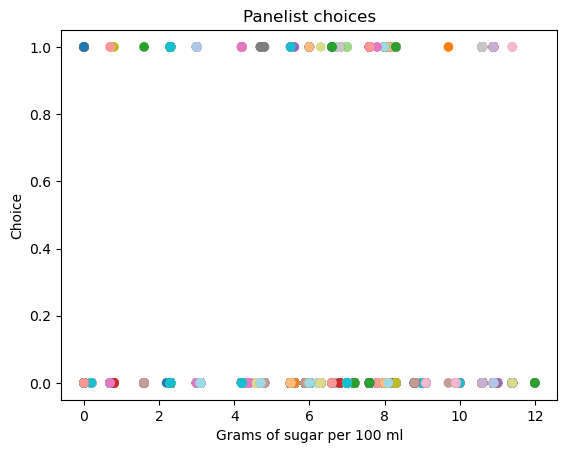

In [15]:
# create a colormap with a unique color for each panelist
panelist_colors = plt.get_cmap('tab20')(df['Panelist'].astype('category').cat.codes / df['Panelist'].nunique())

# create a scatter plot with color-coded points
plt.scatter(df['Grams_of_sugar_per_100_ml'], df['Choice'], c=panelist_colors)

# set the axis labels and title
plt.xlabel('Grams of sugar per 100 ml')
plt.ylabel('Choice')
plt.title('Panelist choices')
plt.show()

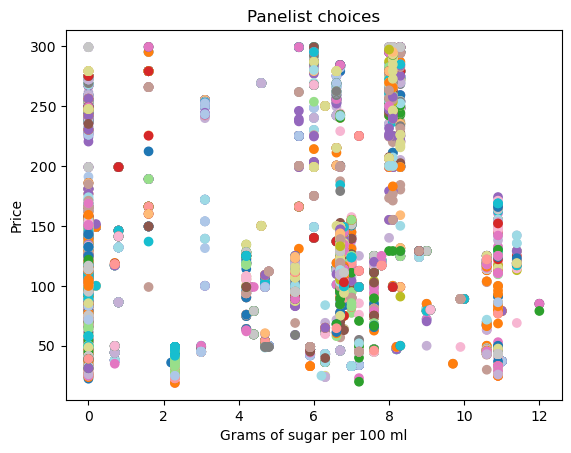

In [16]:
# create a colormap with a unique color for each panelist
panelist_colors = plt.get_cmap('tab20')(df['Panelist'].astype('category').cat.codes / df['Panelist'].nunique())

# create a scatter plot with color-coded points
plt.scatter(df['Grams_of_sugar_per_100_ml'], df['Price'], c=panelist_colors)

# set the axis labels and title
plt.xlabel('Grams of sugar per 100 ml')
plt.ylabel('Price')
plt.title('Panelist choices')
plt.show()

In [17]:
#replace values in 'Choice' that are greater than 1 with 1
df.loc[df['Choice']>1, 'Choice'] = 1

## Построение регрессий

Учесть что функция полезности у д/х кот. не покупали не сахаро содержащие = 0

// добавить регрессии в список, у д/х кот. не покупали не сахаро содержащие и отобразить

In [18]:
# create a dictionary to store the results of the regressions for each panelist
regressions = {}

# get all unique panelists from the dataset
panelists = df["Panelist"].unique()

#sugar_zero_panelist = []
#zero_no_sugar_panelist  = []
# loop through all the unique panelists
for panelist in panelists:
    # get the data for the current panelist
    panelist_data = df[df["Panelist"] == panelist]
    
    # split the data into two datasets based on the sugar content
    sugar_data = panelist_data[panelist_data["Grams_of_sugar_per_100_ml"] > 0]
    no_sugar_data = panelist_data[panelist_data["Grams_of_sugar_per_100_ml"] == 0]

    # create two separate linear regression models for products with and without sugar

    if sugar_data.shape[0] > 0:
      sugar_reg = LinearRegression().fit(sugar_data[["Price"]], sugar_data[["Choice"]])
      a0_sugar, a1_sugar = sugar_reg.intercept_[0], sugar_reg.coef_[0][0]
    else:
      a0_sugar, a1_sugar = 0, 0
    
    if no_sugar_data.shape[0] > 0:
      no_sugar_reg = LinearRegression().fit(no_sugar_data[["Price"]], no_sugar_data[["Choice"]])
      a0_no_sugar, a1_no_sugar = no_sugar_reg.intercept_[0], no_sugar_reg.coef_[0][0]
    else:
      a0_no_sugar, a1_no_sugar = 0, 0
    
    # store the results of the regression models
    regressions[panelist] = ((a0_sugar, a1_sugar), (a0_no_sugar, a1_no_sugar))

print(regressions)

{800540: ((0.1283330511081054, -0.0008270544614227352), (0.013718882407131611, 0.00013794855152829424)), 656400: ((0.11035965586858942, -0.0003878044367797659), (0.0, -0.0)), 399310: ((0.033011951190754334, 0.000513441552862706), (0.0, 0.0)), 508570: ((0.17788867274409992, -0.0016926636602374832), (0.0, 0.0)), 707370: ((0.0, 0.0), (9.626955561828632, -0.0934564638561411)), 372010: ((0.0, 0.0), (60.149999999999984, -0.5999999999999999)), 651170: ((0.4266383855876653, -0.003718932328040339), (0.0, -0.0)), 678350: ((0.07138706065152584, 0.00017509148693562764), (0.0, -0.0)), 628800: ((0.13225132073179094, -0.00028877916482987725), (0.0, 0.0)), 147840: ((0.27876089236288615, -0.0022069399318654518), (0.0, -0.0)), 642350: ((0.0, -0.0), (0.7360992308605424, -0.002581786260199599)), 671270: ((0.0, -0.0), (2.5405001789992965, -0.02481895620124182)), 187700: ((0.0, -0.0), (2.107837750714212, -0.01952257589827142)), 674770: ((0.08747366670783316, -0.00021187507558397686), (0.6739830009141469, -0

In [19]:
regressions[800540]

((0.1283330511081054, -0.0008270544614227352),
 (0.013718882407131611, 0.00013794855152829424))

In [20]:
#no_sugar_data = df[df["Grams_of_sugar_per_100_ml"] == 0]
#sugar_data = df[df["Grams_of_sugar_per_100_ml"] > 0]
#no_sugar_data.shape

In [21]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

results_df = pd.DataFrame(columns=["Panelist", "Sugar R-squared", "No Sugar R-squared", 
                                    "Sugar Intercept", "Sugar Coefficients",
                                    "No Sugar Intercept", "No Sugar Coefficients"])
k = 0

for panelist in regressions:
  sugar_reg, no_sugar_reg = regressions[panelist]
  
  #Sugar
#Sugar
  sugar_r2 = 0
  if sugar_reg[0] != 0:
    sugar_data = df[(df["Panelist"] == panelist) & (df["Grams_of_sugar_per_100_ml"] > 0)]
    if sugar_data.shape[0] > 0:
      sugar_preds = sugar_reg[0] + sugar_reg[1]*sugar_data["Price"]
      sugar_r2 = r2_score(sugar_data["Choice"], sugar_preds)


  sugar_intercept = sugar_reg[0]
  sugar_coef = sugar_reg[1]

  
  #No Sugar
  no_sugar_r2 = 0
  if no_sugar_reg[0] != 0:
    no_sugar_data = df[(df["Panelist"] == panelist) & (df["Grams_of_sugar_per_100_ml"] == 0)]
    if no_sugar_data.shape[0] > 0:  # check for no_sugar_data
      no_sugar_preds = no_sugar_reg[0] + no_sugar_reg[1]*no_sugar_data["Price"]
      no_sugar_r2 = r2_score(no_sugar_data["Choice"], no_sugar_preds)

  no_sugar_intercept = no_sugar_reg[0]
  no_sugar_coef = no_sugar_reg[1]
  
  new_row = {"Panelist": panelist, "Sugar R-squared": sugar_r2, "No Sugar R-squared": no_sugar_r2,
             "Sugar Intercept": sugar_intercept, "Sugar Coefficients": sugar_coef, 
             "No Sugar Intercept": no_sugar_intercept, "No Sugar Coefficients": no_sugar_coef}
  results_df = results_df.append(new_row, ignore_index=True)

  results_df['Sugar Coefficients'] = results_df['Sugar Coefficients'].apply(lambda x: (x.tolist()[0])[0] if type(x) is np.ndarray else x)
  results_df['No Sugar Coefficients'] = results_df['No Sugar Coefficients'].apply(lambda x: (x.tolist()[0])[0] if type(x) is np.ndarray else x)
  results_df['Sugar Intercept'] = results_df['Sugar Intercept'].apply(lambda x: (x.tolist()[0]) if type(x) is np.ndarray else x)
  results_df['No Sugar Intercept'] = results_df['No Sugar Intercept'].apply(lambda x: (x.tolist()[0]) if type(x) is np.ndarray else x)

results_df = results_df.fillna(0)
results_df


,Panelist,Sugar R-squared,No Sugar R-squared,Sugar Intercept,Sugar Coefficients,No Sugar Intercept,No Sugar Coefficients
0,800540.0,0.041104,0.001819,0.128333,-0.000827,0.013719,0.000138
1,656400.0,0.010615,0.000000,0.110360,-0.000388,0.000000,-0.000000
2,399310.0,0.004650,0.000000,0.033012,0.000513,0.000000,0.000000
3,508570.0,0.050106,0.000000,0.177889,-0.001693,0.000000,0.000000
4,707370.0,0.000000,0.062148,0.000000,0.000000,9.626956,-0.093456
...,...,...,...,...,...,...,...
194,626420.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
195,689360.0,1.000000,0.000000,-2.450000,0.050000,0.000000,0.000000
196,633950.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
197,357000.0,1.000000,0.000000,-47.169933,0.708381,0.000000,0.000000


In [22]:
results_df.mean()

Panelist                 541950.100503
Sugar R-squared               0.103713
No Sugar R-squared            0.085775
Sugar Intercept              -0.301900
Sugar Coefficients            0.005303
No Sugar Intercept            0.531079
No Sugar Coefficients        -0.004616
dtype: float64

In [23]:
results_df.isna().sum()

Panelist                 0
Sugar R-squared          0
No Sugar R-squared       0
Sugar Intercept          0
Sugar Coefficients       0
No Sugar Intercept       0
No Sugar Coefficients    0
dtype: int64

In [24]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Panelist               199 non-null    float64
 1   Sugar R-squared        199 non-null    float64
 2   No Sugar R-squared     199 non-null    float64
 3   Sugar Intercept        199 non-null    float64
 4   Sugar Coefficients     199 non-null    float64
 5   No Sugar Intercept     199 non-null    float64
 6   No Sugar Coefficients  199 non-null    float64
dtypes: float64(7)
memory usage: 11.0 KB


## Высчет координат по регрессиям

In [25]:
import shapely.geometry

In [26]:
from shapely.geometry import LineString, Polygon

coordinates = {}
rectangles = {}
diagonals = {}

for panelist, (sugar_reg, no_sugar_reg) in regressions.items():
    # get the maximum price at which the consumer is willing to buy sugar product
    sugar_consistent_coords = []
    max_price_cc = 0
    if sugar_reg is not None:
      a0, a1 = sugar_reg
      sugar_data = df[(df["Panelist"] == panelist) & (df["Grams_of_sugar_per_100_ml"] > 0)]
      if a1!=0:
        max_price_cc = (0 - a0) / a1
        max_price_cc = max(max_price_cc, 0)  # enforce a minimum price of 0
        if isinstance(sugar_reg, LinearRegression):
          sugar_consistent_coords = [(0, 0), (max_price_cc, 0), (max_price_cc, sugar_reg.predict([[max_price_cc]])[0]), (0, sugar_reg.predict([[0]])[0])]
        else:
          sugar_consistent_coords = [(0, 0), (max_price_cc, 0), (0, max_price_cc), (0, 0)]
    else:
        max_price_cc = 0
        sugar_consistent_coords = None
    
    # get the maximum price at which the consumer is willing to buy no sugar product
    no_sugar_consistent_coords = []
    max_price_z = 0
    if no_sugar_reg is not None:
      a0_1, a1_1 = no_sugar_reg
      no_sugar_data = df[(df["Panelist"] == panelist) & (df["Grams_of_sugar_per_100_ml"] == 0)]
      if a1_1!=0:
        max_price_z = (0 - a0_1) / a1_1
        max_price_z = max(max_price_z, 0)  # enforce a minimum price of 0
        if isinstance(no_sugar_reg, LinearRegression):
          no_sugar_consistent_coords = [(0, 0), (max_price_z, 0), (max_price_z, no_sugar_reg.predict([[max_price_z]])[0]), (0, no_sugar_reg.predict([[0]])[0])]
        else:
          no_sugar_consistent_coords = [(0, 0), (max_price_z, 0), (0, max_price_z), (0, 0)]
    else:
        max_price_z = 0
        no_sugar_consistent_coords = None
    
    if (max_price_cc != 0) and (max_price_z != 0):  
        # store the results of the coordinates
        bottom_left = (0, 0)
        bottom_right = (max_price_cc, 0)
        top_left = (0, max_price_z)
        top_right = (max_price_cc, max_price_z)

        # create a list of the coordinates for the rectangle
        rect_coords = [bottom_left, bottom_right, top_left,top_right]
        
        rectangle = shapely.geometry.Polygon([bottom_left, bottom_right, top_right, top_left])
        rectangles[panelist] = rectangle

        diagonal = shapely.geometry.LineString([(0, max_price_z), (max_price_cc, 0)])
        diagonals[panelist] = diagonal

        # add the rectangle coordinates to the dictionary
        coordinates[panelist] = {
        "max_price_cc": max_price_cc,
        "max_price_z": max_price_z,
        "rect_coords": rect_coords
}


print(coordinates)


{674770: {'max_price_cc': 412.8549168265094, 'max_price_z': 130.79240954065293, 'rect_coords': [(0, 0), (412.8549168265094, 0), (0, 130.79240954065293), (412.8549168265094, 130.79240954065293)]}, 169440: {'max_price_cc': 101.05683713966377, 'max_price_z': 272.9201249646149, 'rect_coords': [(0, 0), (101.05683713966377, 0), (0, 272.9201249646149), (101.05683713966377, 272.9201249646149)]}, 710630: {'max_price_cc': 58.203267128810715, 'max_price_z': 55.58162463380392, 'rect_coords': [(0, 0), (58.203267128810715, 0), (0, 55.58162463380392), (58.203267128810715, 55.58162463380392)]}, 675850: {'max_price_cc': 115.30458029412958, 'max_price_z': 66.13536902162572, 'rect_coords': [(0, 0), (115.30458029412958, 0), (0, 66.13536902162572), (115.30458029412958, 66.13536902162572)]}, 376610: {'max_price_cc': 142.9467655692951, 'max_price_z': 257.5971984382859, 'rect_coords': [(0, 0), (142.9467655692951, 0), (0, 257.5971984382859), (142.9467655692951, 257.5971984382859)]}, 176860: {'max_price_cc': 10

In [27]:
# find intersection points between diagonals and rectangles
intersection_points = {}
for panelist, rectangle in rectangles.items():
  
    diagonal = diagonals[panelist]
    intersection = rectangle.intersection(diagonal)
    intersection_points[panelist] = intersection


In [28]:
# sort rectangles by area
sorted_rectangles = sorted(rectangles.items(), key=lambda x: x[1].area, reverse=True)
sort_rectangles = dict(sorted_rectangles)
                       
for panelist, rectangle in sort_rectangles.copy().items():
    if (rectangle.bounds[2] > 1300) | (rectangle.bounds[3] > 1300):
        del sort_rectangles[panelist]



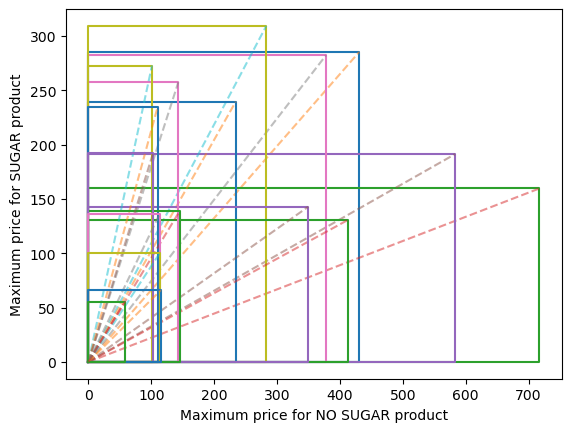

In [29]:
# plot rectangles, diagonals, budget constraints, and intersection points
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for panelist, rectangle in sort_rectangles.items():
    x, y = rectangle.exterior.xy
    ax.plot(x, y, label=panelist)

    # calculate the end points of the diagonal
    upper_right = (rectangle.bounds[2], rectangle.bounds[3])
    diagonal_end = (0, rectangle.bounds[3] - rectangle.bounds[0])

    # plot the diagonal
    ax.plot([0, upper_right[0]], [rectangle.bounds[0], upper_right[1]], linestyle="--", alpha=0.5)

# set axis labels
ax.set_xlabel('Maximum price for NO SUGAR product')
ax.set_ylabel('Maximum price for SUGAR product')

plt.show()
# x-axis represents the maximum price for the NO SUGAR product and the y-axis represents the maximum price for the SUGAR product

## Точки пересечения


In [30]:
#need to save points as a set of 4 pair of points

In [31]:
from shapely.geometry import LineString

intersection_points = {}

# Iterate over all panelists and their rectangles
for panelist1, rectangle1 in sort_rectangles.items():
    
    # Get the diagonal line for the current panelist
    diagonal1 = diagonals[panelist1]
    
    # Iterate over all other panelists and their rectangles
    for panelist2, rectangle2 in sort_rectangles.items():
        
        # Skip if it is the same rectangle or if it has already been compared
        if panelist1 == panelist2 or (panelist2, panelist1) in intersection_points:
            continue
        
        # Check for intersection between the two rectangles
        if rectangle1.intersects(rectangle2):
            
            # Get the diagonal line for the other panelist
            diagonal2 = diagonals[panelist2]
            
            # Compute the intersection between the two diagonals
            diagonal_intersection = diagonal1.intersection(diagonal2)
            
            # Compute the intersection between the two rectangles
            rectangle_intersection = rectangle1.intersection(rectangle2)
            
            # Compute the intersection between the rectangle and the opposite diagonal
            opposite_diagonal = LineString([(rectangle2.bounds[0], rectangle2.bounds[3]), 
                                            (rectangle2.bounds[2], rectangle2.bounds[1])])
            opposite_intersection = rectangle1.intersection(opposite_diagonal)
            
            # Store the intersection points in a dictionary
            intersection_points[(panelist1, panelist2)] = {
                "diagonal_intersection": diagonal_intersection,
                "rectangle_intersection": rectangle_intersection,
                "opposite_intersection": opposite_intersection
            }


intersection_point_set = set()

for intersection in intersection_points.values():
    diagonal_intersection_coords = list(intersection['diagonal_intersection'].coords)
    rectangle_intersection_coords = list(intersection['rectangle_intersection'].exterior.coords)
    opposite_intersection_coords = list(intersection['opposite_intersection'].coords)

    intersection_point_set.update(diagonal_intersection_coords)
    intersection_point_set.update(rectangle_intersection_coords)
    intersection_point_set.update(opposite_intersection_coords)



In [32]:
len(intersection_points)

136

In [33]:
len(intersection_point_set)

211

In [34]:
list(intersection_point_set)[:10]

[(19.771953534871066, 155.30788757465706),
 (101.05683713966377, 138.79133683972475),
 (109.84352277205349, 66.13536902162572),
 (109.84352277205349, 138.79133683972475),
 (58.203267128810715, 0.0),
 (430.57196191327114, 159.7114735820122),
 (102.79693733035413, 100.00000000000001),
 (48.161269208632234, 142.8529273072343),
 (58.60525723779759, 82.66567688175058),
 (101.05683713966377, 159.7114735820122)]

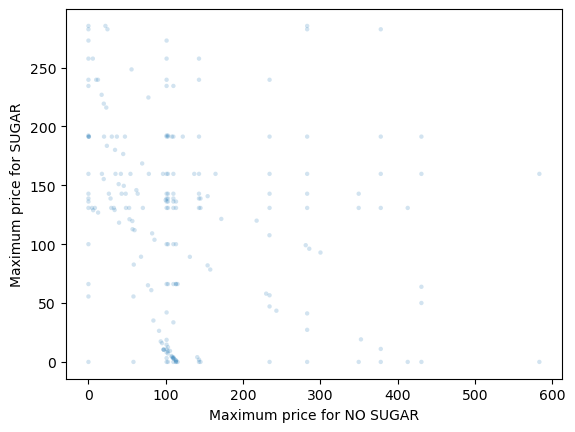

In [35]:
from shapely.geometry import Point

intersection_point_list = list(intersection_point_set)
# Create a figure and axis object
fig, ax = plt.subplots()

x = [p[0] for p in intersection_point_list]  
y = [p[1] for p in intersection_point_list]


# Create a scatter plot
ax.scatter(x, y, marker='o', s=10, alpha=0.2, edgecolors='none')

ax.set_xlabel('Maximum price for NO SUGAR')
ax.set_ylabel('Maximum price for SUGAR')

plt.show()


In [36]:
coor_df = pd.DataFrame.from_dict(coordinates, orient='index')
coor_df.index.name = 'Panelist'

coor_df[(coor_df.index == 702140) | (coor_df.index == 105450)]

,max_price_cc,max_price_z,rect_coords
Panelist,,,


In [37]:
results_df

,Panelist,Sugar R-squared,No Sugar R-squared,Sugar Intercept,Sugar Coefficients,No Sugar Intercept,No Sugar Coefficients
0,800540.0,0.041104,0.001819,0.128333,-0.000827,0.013719,0.000138
1,656400.0,0.010615,0.000000,0.110360,-0.000388,0.000000,-0.000000
2,399310.0,0.004650,0.000000,0.033012,0.000513,0.000000,0.000000
3,508570.0,0.050106,0.000000,0.177889,-0.001693,0.000000,0.000000
4,707370.0,0.000000,0.062148,0.000000,0.000000,9.626956,-0.093456
...,...,...,...,...,...,...,...
194,626420.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
195,689360.0,1.000000,0.000000,-2.450000,0.050000,0.000000,0.000000
196,633950.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
197,357000.0,1.000000,0.000000,-47.169933,0.708381,0.000000,0.000000


## Подсчет utility 

In [39]:
len(intersection_point_list)

211

In [40]:
# Define a function to calculate utility
def calculate_utility(a0, a1, price):
    return a0 + a1*price
utilities = {}
# n = 5000
# intersection_point_array = np.array(intersection_point_list[:n])
# intersection_point_array = np.array(intersection_point_list[n-1:])
intersection_point_array = np.array(intersection_point_list)

# Iterate over a subset of intersection points for this panelist
for i in range(len(intersection_point_array)):
    price_no_sugar, price_sugar = intersection_point_array[i]

    # Get the intercept and coefficients for all panelists at this intersection point
    no_sugar_intercept_array = results_df['No Sugar Intercept'].values
    no_sugar_coefficients_array = results_df['No Sugar Coefficients'].values
    sugar_intercept_array = results_df['Sugar Intercept'].values
    sugar_coefficients_array = results_df['Sugar Coefficients'].values

    # Calculate the utility for each product category using vectorized NumPy array operations
    u_no_sugar_array = calculate_utility(no_sugar_intercept_array, no_sugar_coefficients_array, price_no_sugar)
    u_sugar_array = calculate_utility(sugar_intercept_array, sugar_coefficients_array, price_sugar)

    # Store the utilities for all panelists at this intersection point using a dictionary comprehension
    utilities.update({(panelist, tuple(intersection_point_array[i])): {
        "u_no_sugar": u_no_sugar_array[j],
        "u_sugar": u_sugar_array[j]
    } for j, panelist in enumerate(results_df['Panelist'])})

# Convert the utilities dictionary to a pandas dataframe
utility_df = pd.DataFrame.from_dict(utilities, orient='index')
utility_df.index.names = ['Panelist', 'Intersection_Point']
utility_df = utility_df.reset_index()
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115
1,656400.0,"(19.771953534871066, 155.30788757465706)",0.000000,0.050131
2,399310.0,"(19.771953534871066, 155.30788757465706)",0.000000,0.112753
3,508570.0,"(19.771953534871066, 155.30788757465706)",0.000000,-0.084995
4,707370.0,"(19.771953534871066, 155.30788757465706)",7.779139,0.000000
...,...,...,...,...
41984,626420.0,"(101.05683713966377, 66.13536902162572)",1.000000,0.000000
41985,689360.0,"(101.05683713966377, 66.13536902162572)",0.000000,0.856768
41986,633950.0,"(101.05683713966377, 66.13536902162572)",1.000000,0.000000
41987,357000.0,"(101.05683713966377, 66.13536902162572)",0.000000,-0.320870


In [41]:
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115
1,656400.0,"(19.771953534871066, 155.30788757465706)",0.000000,0.050131
2,399310.0,"(19.771953534871066, 155.30788757465706)",0.000000,0.112753
3,508570.0,"(19.771953534871066, 155.30788757465706)",0.000000,-0.084995
4,707370.0,"(19.771953534871066, 155.30788757465706)",7.779139,0.000000
...,...,...,...,...
41984,626420.0,"(101.05683713966377, 66.13536902162572)",1.000000,0.000000
41985,689360.0,"(101.05683713966377, 66.13536902162572)",0.000000,0.856768
41986,633950.0,"(101.05683713966377, 66.13536902162572)",1.000000,0.000000
41987,357000.0,"(101.05683713966377, 66.13536902162572)",0.000000,-0.320870


In [42]:
del regressions
del intersection_points

In [43]:
del utilities

In [44]:
#utility_df.to_csv('utility_df3.csv')

## Profit calculation

In [45]:
init_df = pd.read_csv('https://raw.githubusercontent.com/AnikaJha/cola_project_dataset/main/panelist_2nd.csv')
init_df.head()

,Panelist,Banner_name,Quarter,BG_Category_number,Date_of_purchase,Barcode,Total_unit_sales,Total_value_sales,Total_volume_sales,BG_Category_name,...,Choice,week_number,Price,Discount,New banner label,Brand,Form,Flavor,Volume (ml),Size
0,636220.0,Jumbo,201601.0,Cat50,2016-01-04,40822938,0.0,0.0,0.0,Other Flavored Carbonates,...,0.0,1,65.0,12.162162,Jumbo,Fanta,Fruit Carbonates,Orange,500,"[251, 501)"
1,636220.0,Jumbo,201601.0,Cat50,2016-01-04,50112753,0.0,0.0,0.0,Other Flavored Carbonates,...,0.0,1,117.0,0.000000,Jumbo,Fanta,Fruit Carbonates,Other Fruit,500,"[251, 501)"
2,636220.0,Jumbo,201601.0,Cat50,2016-01-04,54492493,0.0,0.0,0.0,Other Flavored Carbonates,...,0.0,1,117.0,0.000000,Jumbo,Fanta,Fruit Carbonates,Lemon,500,"[251, 501)"
3,636220.0,Jumbo,201601.0,Cat50,2016-01-04,87222470,0.0,0.0,0.0,Other Flavored Carbonates,...,0.0,1,38.0,6.172840,Jumbo,Gazeuse,Lemonade,Lemon,750,"[501, 1000)"
4,636220.0,Jumbo,201601.0,Cat50,2016-01-04,87222463,0.0,0.0,0.0,Other Flavored Carbonates,...,0.0,1,35.4,13.658537,Jumbo,Gazeuse,Lemonade,Other,750,"[501, 1000)"


In [46]:
# Create a pivot table for each panelist counting the sum of its 'Choice' column
q = pd.pivot_table(init_df, values='Choice', index='Panelist', aggfunc=sum).reset_index()
q

,Panelist,Choice
0,710.0,2.0
1,1280.0,2.0
2,4700.0,3.0
3,7220.0,1.0
4,7770.0,2.0
...,...,...
1989,808440.0,4.0
1990,808540.0,2.0
1991,808550.0,21.0
1992,808560.0,1.0


т.е. Profit = P*Q, где P - цена, Q - количество

В точке (1;5) у нас: 
P cc = 1, P z = 5
Q - это количество продукта, которое готово купить дх (то есть его спрос). Предполагаем, что это стационарное число, его нужно посчитать для каждого дх. Надо подумать, на основе какиех данных определять спрос для каждого дх - либо на основе общего количества покупок продукта (штуки), либо на основе объема (литры/мл)

In [47]:
utility_df = utility_df.merge(q[['Panelist', 'Choice']], on='Panelist')
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115,27.0
1,800540.0,"(101.05683713966377, 138.79133683972475)",0.027660,0.013545,27.0
2,800540.0,"(109.84352277205349, 66.13536902162572)",0.028872,0.073635,27.0
3,800540.0,"(109.84352277205349, 138.79133683972475)",0.028872,0.013545,27.0
4,800540.0,"(58.203267128810715, 0.0)",0.021748,0.128333,27.0
...,...,...,...,...,...
41984,624670.0,"(102.79693733035413, 159.7114735820122)",0.000000,-5.106222,1.0
41985,624670.0,"(101.05683713966377, 8.172092980541482)",0.000000,3.031331,1.0
41986,624670.0,"(39.580749670700015, 118.25323073990319)",0.000000,-2.879945,1.0
41987,624670.0,"(282.8117091463, 159.7114735820122)",0.000000,-5.106222,1.0


In [48]:
# Create a function to calculate profit
def calculate_profit(u_no_sugar, u_sugar, price_no_sugar, price_sugar, q):
    if (u_sugar >= 0 and u_no_sugar >= 0):
        if (u_sugar == u_no_sugar):
            if (price_sugar >= price_no_sugar):
                return price_sugar * q, 'S'
            else: 
                return price_no_sugar * q, 'NS'
        elif (u_sugar > u_no_sugar):
            return price_sugar * q, 'S'
        elif (u_sugar < u_no_sugar):
            return price_no_sugar * q, 'NS'
    elif (u_sugar >= 0 and u_no_sugar < 0):
        return price_sugar * q, 'S'
    elif (u_sugar < 0 and u_no_sugar >= 0):
        return price_no_sugar * q, 'NS'
    else:
        return 0, '-' #???

In [49]:
utility_df['Profit'],utility_df['Type']  = zip(*(utility_df.apply(lambda row: calculate_profit(row['u_no_sugar'], 
                                                                     row['u_sugar'], row['Intersection_Point'][0], row['Intersection_Point'][1], 
                                                                     row['Choice']), axis=1)))
utility_df['Profit'] = utility_df['Profit'].round(2)
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice,Profit,Type
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115,27.0,533.84,NS
1,800540.0,"(101.05683713966377, 138.79133683972475)",0.027660,0.013545,27.0,2728.53,NS
2,800540.0,"(109.84352277205349, 66.13536902162572)",0.028872,0.073635,27.0,1785.65,S
3,800540.0,"(109.84352277205349, 138.79133683972475)",0.028872,0.013545,27.0,2965.78,NS
4,800540.0,"(58.203267128810715, 0.0)",0.021748,0.128333,27.0,0.00,S
...,...,...,...,...,...,...,...
41984,624670.0,"(102.79693733035413, 159.7114735820122)",0.000000,-5.106222,1.0,102.80,NS
41985,624670.0,"(101.05683713966377, 8.172092980541482)",0.000000,3.031331,1.0,8.17,S
41986,624670.0,"(39.580749670700015, 118.25323073990319)",0.000000,-2.879945,1.0,39.58,NS
41987,624670.0,"(282.8117091463, 159.7114735820122)",0.000000,-5.106222,1.0,282.81,NS


In [50]:
utility_df = utility_df[utility_df['Type']!='-']
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice,Profit,Type
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115,27.0,533.84,NS
1,800540.0,"(101.05683713966377, 138.79133683972475)",0.027660,0.013545,27.0,2728.53,NS
2,800540.0,"(109.84352277205349, 66.13536902162572)",0.028872,0.073635,27.0,1785.65,S
3,800540.0,"(109.84352277205349, 138.79133683972475)",0.028872,0.013545,27.0,2965.78,NS
4,800540.0,"(58.203267128810715, 0.0)",0.021748,0.128333,27.0,0.00,S
...,...,...,...,...,...,...,...
41984,624670.0,"(102.79693733035413, 159.7114735820122)",0.000000,-5.106222,1.0,102.80,NS
41985,624670.0,"(101.05683713966377, 8.172092980541482)",0.000000,3.031331,1.0,8.17,S
41986,624670.0,"(39.580749670700015, 118.25323073990319)",0.000000,-2.879945,1.0,39.58,NS
41987,624670.0,"(282.8117091463, 159.7114735820122)",0.000000,-5.106222,1.0,282.81,NS


In [1]:
utility_df.to_csv('utility_df.csv')
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice,Profit,Type
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115,27.0,533.84,NS
1,800540.0,"(101.05683713966377, 138.79133683972475)",0.027660,0.013545,27.0,2728.53,NS
2,800540.0,"(109.84352277205349, 66.13536902162572)",0.028872,0.073635,27.0,1785.65,S
3,800540.0,"(109.84352277205349, 138.79133683972475)",0.028872,0.013545,27.0,2965.78,NS
4,800540.0,"(58.203267128810715, 0.0)",0.021748,0.128333,27.0,0.00,S
...,...,...,...,...,...,...,...
41984,624670.0,"(102.79693733035413, 159.7114735820122)",0.000000,-5.106222,1.0,102.80,NS
41985,624670.0,"(101.05683713966377, 8.172092980541482)",0.000000,3.031331,1.0,8.17,S
41986,624670.0,"(39.580749670700015, 118.25323073990319)",0.000000,-2.879945,1.0,39.58,NS
41987,624670.0,"(282.8117091463, 159.7114735820122)",0.000000,-5.106222,1.0,282.81,NS


## профиты

In [52]:
# Drop the 'Panelist' column from utility_df
#utility_df = utility_df.drop('Panelist', axis=1)

# Group by intersection point and calculate maximum profit
profit_df = utility_df.groupby('Intersection_Point').sum()[['Profit']]

# Round the profit to 2 decimal places
profit_df = profit_df.round(2)

# Reset the index and rename columns
profit_df = profit_df.reset_index().rename(columns={'Intersection_Point': 'Intersection Point'})

In [53]:
profit_df

,Intersection Point,Profit
0,"(0.0, 0.0)",0.00
1,"(0.0, 55.58162463380392)",56304.07
2,"(0.0, 66.13536902162572)",67392.06
3,"(0.0, 100.00000000000001)",104900.00
4,"(0.0, 130.79240954065293)",116535.86
...,...,...
206,"(430.57196191327114, 63.814997632039706)",201942.16
207,"(430.57196191327114, 159.7114735820122)",359196.82
208,"(430.57196191327114, 191.35130395536777)",400752.10
209,"(583.0860432350606, 0.0)",193001.50


In [54]:
profit_df.to_csv('profit_df.csv')

In [55]:
#profit_df['Price'] = max(profit_df.iloc(['Intersection Point'][0]), profit_df.iloc(['Intersection Point'][1]))
profit_df

,Intersection Point,Profit
0,"(0.0, 0.0)",0.00
1,"(0.0, 55.58162463380392)",56304.07
2,"(0.0, 66.13536902162572)",67392.06
3,"(0.0, 100.00000000000001)",104900.00
4,"(0.0, 130.79240954065293)",116535.86
...,...,...
206,"(430.57196191327114, 63.814997632039706)",201942.16
207,"(430.57196191327114, 159.7114735820122)",359196.82
208,"(430.57196191327114, 191.35130395536777)",400752.10
209,"(583.0860432350606, 0.0)",193001.50


# Определение потенциально оптимальных налоговых ставок


In [57]:
# Calculate the alpha value for each pair of intersection points
from itertools import combinations
alpha_list = []
for p1, p2 in combinations(utility_df['Intersection_Point'].unique(), 2):
    sq_p1_ns = utility_df[(utility_df['Intersection_Point'] == p1) & (utility_df['Type'] == 'NS')]['Choice'].sum()
    sq_p1_s = utility_df[(utility_df['Intersection_Point'] == p1) & (utility_df['Type'] == 'S')]['Choice'].sum()
    ns_price1 = p1[0]
    s_price1 = p1[1]
    sq_p2_ns = utility_df[(utility_df['Intersection_Point'] == p2) & (utility_df['Type'] == 'NS')]['Choice'].sum()
    sq_p2_s = utility_df[(utility_df['Intersection_Point'] == p2) & (utility_df['Type'] == 'S')]['Choice'].sum()
    ns_price2 = p2[0]
    s_price2 = p2[1]
    denominator = 0
    denominator = (sq_p2_s * (s_price1 - s_price2) - sq_p1_s * (s_price2 - s_price1) + sq_p1_ns * ns_price2 - sq_p2_ns * ns_price1)
    if denominator != 0:
      numerator = 0
      numerator = (sq_p1_ns * ns_price1 + sq_p1_s * s_price1 - sq_p2_ns * ns_price2)
      alpha = numerator / denominator
    else: alpha = 0
    alpha_list.append((p1, p2, alpha))

# Convert the alpha_list to a DataFrame
alpha_df = pd.DataFrame(alpha_list, columns=['Intersection_Point1', 'Intersection_Point2', 'Alpha'])
alpha_df

,Intersection_Point1,Intersection_Point2,Alpha
0,"(19.771953534871066, 155.30788757465706)","(101.05683713966377, 138.79133683972475)",0.647491
1,"(19.771953534871066, 155.30788757465706)","(109.84352277205349, 66.13536902162572)",0.315169
2,"(19.771953534871066, 155.30788757465706)","(109.84352277205349, 138.79133683972475)",0.554268
3,"(19.771953534871066, 155.30788757465706)","(58.203267128810715, 0.0)",0.342251
4,"(19.771953534871066, 155.30788757465706)","(430.57196191327114, 159.7114735820122)",-0.123028
...,...,...,...
22150,"(101.05683713966377, 8.172092980541482)","(282.8117091463, 159.7114735820122)",0.291034
22151,"(101.05683713966377, 8.172092980541482)","(101.05683713966377, 66.13536902162572)",-0.045286
22152,"(39.580749670700015, 118.25323073990319)","(282.8117091463, 159.7114735820122)",0.133932
22153,"(39.580749670700015, 118.25323073990319)","(101.05683713966377, 66.13536902162572)",0.479367


In [58]:
alpha_df = pd.DataFrame(alpha_list, columns=['Intersection_Point1', 'Intersection_Point2', 'Alpha'])
alpha_df = alpha_df['Alpha'].drop_duplicates()

In [59]:
print(len(alpha_df.unique()))

22120


In [60]:
alpha_df = pd.DataFrame(alpha_df, columns = ['Alpha'])
alpha_df.sort_values(by='Alpha', inplace=True, ascending=True)
alpha_df.reset_index(inplace=True, drop=True)
alpha_df

,Alpha
0,-3121.616168
1,-2440.531475
2,-797.226825
3,-784.719141
4,-764.056289
...,...
22115,585.135340
22116,829.824609
22117,3305.028696
22118,4511.627972


In [2]:
alpha_df[(alpha_df['Alpha'] <= 1) & (alpha_df['Alpha'] >= 0)]

,Alpha
10060,-0.000000
10061,0.000108
10062,0.000305
10063,0.000579
10064,0.000672
...,...
18686,0.999004
18687,0.999165
18688,0.999207
18689,0.999830


In [3]:
alpha_df.to_csv('alpha_df.csv')

In [10]:
grouped_df = pd.DataFrame(utility_df.groupby(['Intersection_Point','Type'])['Choice'].sum())
grouped_df = grouped_df.reset_index()
grouped_df

,Intersection_Point,Type,Choice
0,"(0.0, 0.0)",NS,661.0
1,"(0.0, 0.0)",S,976.0
2,"(0.0, 55.58162463380392)",NS,624.0
3,"(0.0, 55.58162463380392)",S,1013.0
4,"(0.0, 66.13536902162572)",NS,621.0
...,...,...,...
417,"(430.57196191327114, 191.35130395536777)",S,1048.0
418,"(583.0860432350606, 0.0)",NS,331.0
419,"(583.0860432350606, 0.0)",S,1299.0
420,"(583.0860432350606, 159.7114735820122)",NS,434.0


ниже грузится дольше 30 минут!!!

In [12]:
max_profit_list = []
for alpha in alpha_df['Alpha']:
    max_profit = {'Alpha': alpha, 'Total_Profit': 0}
    for intersection_point, group in grouped_df.groupby(['Intersection_Point']):
        ns_choice = group.loc[group['Type'] == 'NS', 'Choice'].values[0]
        s_choice = group.loc[group['Type'] == 'S', 'Choice'].values[0]
        ns_profit = intersection_point[0] * ns_choice
        s_profit = intersection_point[1] * s_choice
        s_taxes = s_profit * alpha
        s_profit_alpha = s_profit * (1-alpha)
        total_profit = ns_profit + s_profit_alpha
        if total_profit > max_profit['Total_Profit']:
            max_profit['Intersection_Point'] = intersection_point
            max_profit['NS_Choice'] = ns_choice
            max_profit['S_Choice'] = s_choice
            max_profit['NS_Profit'] = ns_profit
            max_profit['S_Profit_without_1-alpha'] = s_profit
            max_profit['Sum_of_taxes'] = s_taxes
            max_profit['S_Profit_with_1-alpha'] = s_profit_alpha
            max_profit['Total_Profit'] = total_profit
        
    max_profit_list.append(max_profit)
    
max_profit_df = pd.DataFrame(max_profit_list)


In [24]:
max_profit_df = pd.DataFrame(max_profit_list)
max_profit_df['Total_Profit'] = max_profit_df['Total_Profit'].round(2)
max_profit_df['NS_Profit'] = max_profit_df['NS_Profit'].round(2)
max_profit_df['Sum_of_taxes'] = max_profit_df['Sum_of_taxes'].round(2)
max_profit_df['S_Profit_without_1-alpha'] = max_profit_df['S_Profit_without_1-alpha'].round(2)
max_profit_df['S_Profit_with_1-alpha'] = max_profit_df['S_Profit_with_1-alpha'].round(2)

In [2]:
max_profit_df

,Alpha,Total_Profit,Intersection_Point,NS_Choice,S_Choice,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,S_Profit_with_1-alpha
0,-3121.616168,7.571637e+08,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,-7.566760e+08,7.569184e+08
1,-2440.531475,5.920696e+08,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,-5.915819e+08,5.918243e+08
2,-797.226825,1.937345e+08,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,-1.932468e+08,1.934892e+08
3,-784.719141,1.907027e+08,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,-1.902150e+08,1.904574e+08
4,-764.056289,1.856940e+08,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,-1.852063e+08,1.854487e+08
...,...,...,...,...,...,...,...,...,...
22115,585.135340,1.930015e+05,"(583.0860432350606, 0.0)",331.0,1299.0,193001.48,0.00,0.000000e+00,-0.000000e+00
22116,829.824609,1.930015e+05,"(583.0860432350606, 0.0)",331.0,1299.0,193001.48,0.00,0.000000e+00,-0.000000e+00
22117,3305.028696,1.930015e+05,"(583.0860432350606, 0.0)",331.0,1299.0,193001.48,0.00,0.000000e+00,-0.000000e+00
22118,4511.627972,1.930015e+05,"(583.0860432350606, 0.0)",331.0,1299.0,193001.48,0.00,0.000000e+00,-0.000000e+00


In [16]:
max_profit_df['Intersection_Point'].unique()

array([(378.02124603482986, 282.51606378124205),
       (583.0860432350606, 159.7114735820122), (583.0860432350606, 0.0)],
      dtype=object)

In [3]:
max_profit_df2 = max_profit_df[(max_profit_df['Alpha'] < 1) & (max_profit_df['Alpha'] > 0)]
max_profit_df2

,Alpha,Total_Profit,Intersection_Point,NS_Choice,S_Choice,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,S_Profit_with_1-alpha
10061,0.000108,487708.49,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,26.08,242372.70
10062,0.000305,487660.62,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,73.95,242324.83
10063,0.000579,487594.18,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,140.39,242258.39
10064,0.000672,487571.59,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,162.98,242235.80
10065,0.000680,487569.82,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,164.75,242234.03
...,...,...,...,...,...,...,...,...,...
18686,0.999004,253230.90,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172157.12,171.56
18687,0.999165,253203.17,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172184.86,143.82
18688,0.999207,253196.04,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172191.98,136.70
18689,0.999830,253088.60,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172299.42,29.26


In [4]:
max_profit_df.to_csv('max_profit_df.csv')
max_profit_df2.to_csv('max_profit_df2.csv')

In [9]:
intersection_point1 = max_profit_df['Intersection_Point'].unique()[0]
utility_df[utility_df['Intersection_Point'] == intersection_point1]

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice,Profit,Type
44,800540.0,"(378.02124603482986, 282.51606378124205)",0.065866,-0.105323,27.0,10206.57,NS
255,656400.0,"(378.02124603482986, 282.51606378124205)",0.000000,0.000799,5.0,1412.58,S
466,399310.0,"(378.02124603482986, 282.51606378124205)",0.000000,0.178067,1.0,282.52,S
677,508570.0,"(378.02124603482986, 282.51606378124205)",0.000000,-0.300316,1.0,378.02,NS
888,707370.0,"(378.02124603482986, 282.51606378124205)",-25.701573,0.000000,3.0,847.55,S
...,...,...,...,...,...,...,...
40978,626420.0,"(378.02124603482986, 282.51606378124205)",1.000000,0.000000,16.0,6048.34,NS
41189,689360.0,"(378.02124603482986, 282.51606378124205)",0.000000,11.675803,1.0,282.52,S
41400,633950.0,"(378.02124603482986, 282.51606378124205)",1.000000,0.000000,8.0,3024.17,NS
41611,357000.0,"(378.02124603482986, 282.51606378124205)",0.000000,152.959182,1.0,282.52,S


In [5]:
max_profit_df.groupby(['Intersection_Point'])

In [97]:
max_profit_df[(max_profit_df['Intersection_Point'] == intersection_point1) & (max_profit_df['Alpha'] == 0.000)]['Profit']

10060    487734
Name: Profit, dtype: int64

1) профит от продуктов без сахара

2) профит от продуктов с сахаром, отдельно с и без учетом альфа

3) sum of taxes = налоги которая компания платит (профит на альфа)

In [13]:
utility_df

,Panelist,Intersection_Point,u_no_sugar,u_sugar,Choice,Profit,Type
0,800540.0,"(19.771953534871066, 155.30788757465706)",0.016446,-0.000115,27.0,533.84,NS
1,800540.0,"(101.05683713966377, 138.79133683972475)",0.027660,0.013545,27.0,2728.53,NS
2,800540.0,"(109.84352277205349, 66.13536902162572)",0.028872,0.073635,27.0,1785.65,S
3,800540.0,"(109.84352277205349, 138.79133683972475)",0.028872,0.013545,27.0,2965.78,NS
4,800540.0,"(58.203267128810715, 0.0)",0.021748,0.128333,27.0,0.00,S
...,...,...,...,...,...,...,...
41984,624670.0,"(102.79693733035413, 159.7114735820122)",0.000000,-5.106222,1.0,102.80,NS
41985,624670.0,"(101.05683713966377, 8.172092980541482)",0.000000,3.031331,1.0,8.17,S
41986,624670.0,"(39.580749670700015, 118.25323073990319)",0.000000,-2.879945,1.0,39.58,NS
41987,624670.0,"(282.8117091463, 159.7114735820122)",0.000000,-5.106222,1.0,282.81,NS


In [17]:
utility_df_NS = utility_df[utility_df['Type']=='NS'].copy()
utility_df_S = utility_df[utility_df['Type']=='S'].copy()
utility_df_NS = utility_df_NS.groupby('Intersection_Point').sum()[['u_no_sugar']].reset_index()
utility_df_S = utility_df_S.groupby('Intersection_Point').sum()[['u_sugar']].reset_index()
merged_df = utility_df_NS.merge(utility_df_S, on='Intersection_Point', how='inner')
merged_df

,Intersection_Point,u_no_sugar,u_sugar
0,"(0.0, 0.0)",214.527536,26.960963
1,"(0.0, 55.58162463380392)",214.741602,20.168652
2,"(0.0, 66.13536902162572)",214.741602,20.489528
3,"(0.0, 100.00000000000001)",214.621690,47.269155
4,"(0.0, 130.79240954065293)",214.554814,81.259052
...,...,...,...
206,"(430.57196191327114, 63.814997632039706)",378.961438,21.603365
207,"(430.57196191327114, 159.7114735820122)",378.707427,115.515279
208,"(430.57196191327114, 191.35130395536777)",377.707427,153.879290
209,"(583.0860432350606, 0.0)",549.462223,28.616099


In [27]:
sw_df = max_profit_df.groupby('Intersection_Point').sum()[['NS_Profit','S_Profit_without_1-alpha', 'Sum_of_taxes']].reset_index()
sw_df

,Intersection_Point,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes
0,"(378.02124603482986, 282.51606378124205)",4.498968e+09,4.445109e+09,-8.067290e+09
1,"(583.0860432350606, 0.0)",5.108749e+08,0.000000e+00,0.000000e+00
2,"(583.0860432350606, 159.7114735820122)",2.872224e+08,1.955931e+08,2.143710e+08


In [28]:
utility_profit = []
utility_profit_df = pd.DataFrame()
for i in sw_df['Intersection_Point'].unique():
    uprofits = {'Intersection_Point': i, 'No_Sugar_Utilities': 0, 'Sugar_Utilities_without_alpha': 0}
    uprofits['No_Sugar_Utilities'] = utility_df_NS.loc[utility_df_NS['Intersection_Point'] == i,'u_no_sugar'].values[0]
    uprofits['Sugar_Utilities_without_alpha'] = utility_df_S.loc[utility_df_S['Intersection_Point'] == i,'u_sugar'].values[0]
    utility_profit.append(uprofits)
    
utility_profit_df = pd.DataFrame(utility_profit)
utility_profit_df

,Intersection_Point,No_Sugar_Utilities,Sugar_Utilities_without_alpha
0,"(378.02124603482986, 282.51606378124205)",318.856124,263.889483
1,"(583.0860432350606, 0.0)",549.462223,28.616099
2,"(583.0860432350606, 159.7114735820122)",549.155853,115.515279


In [29]:
sw_df[['No_Sugar_Utilities', 'Sugar_Utilities_without_alpha']] = utility_profit_df[['No_Sugar_Utilities', 'Sugar_Utilities_without_alpha']]
sw_df

,Intersection_Point,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,No_Sugar_Utilities,Sugar_Utilities_without_alpha
0,"(378.02124603482986, 282.51606378124205)",4.498968e+09,4.445109e+09,-8.067290e+09,318.856124,263.889483
1,"(583.0860432350606, 0.0)",5.108749e+08,0.000000e+00,0.000000e+00,549.462223,28.616099
2,"(583.0860432350606, 159.7114735820122)",2.872224e+08,1.955931e+08,2.143710e+08,549.155853,115.515279


In [30]:
sw_df['Social_Welfare'] = sw_df.sum(numeric_only=True,axis=1).astype(int)
sw_df

,Intersection_Point,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,No_Sugar_Utilities,Sugar_Utilities_without_alpha,Social_Welfare
0,"(378.02124603482986, 282.51606378124205)",4.498968e+09,4.445109e+09,-8.067290e+09,318.856124,263.889483,876787233
1,"(583.0860432350606, 0.0)",5.108749e+08,0.000000e+00,0.000000e+00,549.462223,28.616099,510875495
2,"(583.0860432350606, 159.7114735820122)",2.872224e+08,1.955931e+08,2.143710e+08,549.155853,115.515279,697187067


In [33]:
# Determine the combination of prices and tax rate that maximizes SW
max_sw_index = sw_df['Social_Welfare'].idxmax()
max_sw_coordinates = sw_df.loc[max_sw_index, 'Intersection_Point']
max_sw = sw_df.loc[max_sw_index, 'Social_Welfare']

print("Combination of prices (coordinates) and tax rate (alpha) that maximizes SW:")
print("Intersection Point:", max_sw_coordinates)
print("Max Social Welfare:", max_sw)

Combination of prices (coordinates) and tax rate (alpha) that maximizes SW:
Intersection Point: (378.02124603482986, 282.51606378124205)
Max Social Welfare: 876787233


In [ ]:
max_sw = sw_df2['Social_Welfare'].idxmax()
alpha = sw_df2['Social_Welfare'].max()/sw_df2.loc[max_sw, 'S_Profit_without_1-alpha']
alpha

In [12]:
max_profit_df2

,Alpha,Total_Profit,Intersection_Point,NS_Choice,S_Choice,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,S_Profit_with_1-alpha
10061,0.000108,487708.49,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,26.08,242372.70
10062,0.000305,487660.62,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,73.95,242324.83
10063,0.000579,487594.18,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,140.39,242258.39
10064,0.000672,487571.59,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,162.98,242235.80
10065,0.000680,487569.82,"(378.02124603482986, 282.51606378124205)",649.0,858.0,245335.79,242398.78,164.75,242234.03
...,...,...,...,...,...,...,...,...,...
18686,0.999004,253230.90,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172157.12,171.56
18687,0.999165,253203.17,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172184.86,143.82
18688,0.999207,253196.04,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172191.98,136.70
18689,0.999830,253088.60,"(583.0860432350606, 159.7114735820122)",434.0,1079.0,253059.34,172328.68,172299.42,29.26


In [76]:
sw_df2 = max_profit_df2.groupby('Intersection_Point').sum()[['NS_Profit','S_Profit_without_1-alpha', 'Sum_of_taxes']].reset_index()
sw_df2

,Intersection_Point,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes
0,"(378.02124603482986, 282.51606378124205)",2.030644e+09,2.006335e+09,6.863885e+08
1,"(583.0860432350606, 159.7114735820122)",8.932995e+07,6.083202e+07,5.746898e+07


In [33]:
utility_profit2 = []
utility_profit_df2 = pd.DataFrame()
for i in sw_df2['Intersection_Point'].unique():
    uprofits2 = {'Intersection_Point': i, 'No_Sugar_Utilities': 0, 'Sugar_Utilities_without_alpha': 0}
    uprofits2['No_Sugar_Utilities'] = utility_df_NS.loc[utility_df_NS['Intersection_Point'] == i,'u_no_sugar'].values[0]
    uprofits2['Sugar_Utilities_without_alpha'] = utility_df_S.loc[utility_df_S['Intersection_Point'] == i,'u_sugar'].values[0]
    utility_profit2.append(uprofits2)
    
utility_profit_df2 = pd.DataFrame(utility_profit2)
utility_profit_df2

,Intersection_Point,No_Sugar_Utilities,Sugar_Utilities_without_alpha
0,"(378.02124603482986, 282.51606378124205)",318.856124,263.889483
1,"(583.0860432350606, 159.7114735820122)",549.155853,115.515279


In [60]:
sw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Intersection_Point        2 non-null      object 
 1   NS_Profit                 2 non-null      float64
 2   S_Profit_without_1-alpha  2 non-null      float64
 3   Sum_of_taxes              2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 192.0+ bytes


In [77]:
sw_df2[['No_Sugar_Utilities', 'Sugar_Utilities_without_alpha']] = utility_profit_df2[['No_Sugar_Utilities', 'Sugar_Utilities_without_alpha']]
sw_df2['Social_Welfare'] = sw_df2.sum(numeric_only=True,axis=1).astype(int)
sw_df2

,Intersection_Point,NS_Profit,S_Profit_without_1-alpha,Sum_of_taxes,No_Sugar_Utilities,Sugar_Utilities_without_alpha,Social_Welfare
0,"(378.02124603482986, 282.51606378124205)",2.030644e+09,2.006335e+09,6.863885e+08,318.856124,263.889483,4723368101
1,"(583.0860432350606, 159.7114735820122)",8.932995e+07,6.083202e+07,5.746898e+07,549.155853,115.515279,207631614


In [46]:
ip

(378.02124603482986, 282.51606378124205)

In [47]:
max_sw2 = sw_df2['Social_Welfare'].max()
max_sw_index2 = sw_df2['Social_Welfare'].idxmax()
ip = sw_df2.loc[max_sw_index2, 'Intersection_Point']
group2 = pd.DataFrame(max_profit_df2.groupby('Intersection_Point').sum()[['S_Profit_with_1-alpha']].reset_index())
s_profit_tax = group2[group2['Intersection_Point']==ip]['S_Profit_with_1-alpha']
s_profit_tax

0    1.319946e+09
Name: S_Profit_with_1-alpha, dtype: float64

In [45]:
alpha = sw_df2.loc[max_sw_index2, 'Sum_of_taxes']/s_profit_tax
alpha

0    0.520012
Name: S_Profit_with_1-alpha, dtype: float64

In [40]:
# Determine the combination of prices and tax rate that maximizes SW
max_sw_coordinates2 = sw_df2.loc[max_sw_index2, 'Intersection_Point']
max_sw2 = sw_df2.loc[max_sw_index2, 'Social_Welfare']

print("Combination of prices (coordinates) and tax rate (alpha) that maximizes SW:")
print("Intersection Point:", max_sw_coordinates2)
print('Optimal alpha:', alpha)
print("Max Social Welfare:", max_sw2)

Combination of prices (coordinates) and tax rate (alpha) that maximizes SW:
Intersection Point: (378.02124603482986, 282.51606378124205)
Optimal alpha: 2.354227385964212
Max Social Welfare: 4723368101
